In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(
    "C:\\Users\\satyam_07\\Downloads\\email_spam.csv",
    encoding="latin1"
)
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = data.iloc[:,0:2]


In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df["v1"] = df["v1"].map({"spam":1, "ham":0},inplace = True,axis = 1)


In [6]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,v1,v2
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [9]:
df.shape

(5572, 2)

In [10]:
df.columns

Index(['v1', 'v2'], dtype='str')

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   v1      5572 non-null   int64
 1   v2      5572 non-null   str  
dtypes: int64(1), str(1)
memory usage: 524.3 KB


In [12]:
df.describe()

,v1
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [14]:
df.rename(columns={"v1":"Target","v2":"Input"},inplace = True)

In [15]:
df

,Target,Input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df = df.drop_duplicates(keep = "first")

In [18]:
df.duplicated().sum()

np.int64(0)

# 

# EDA

In [19]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

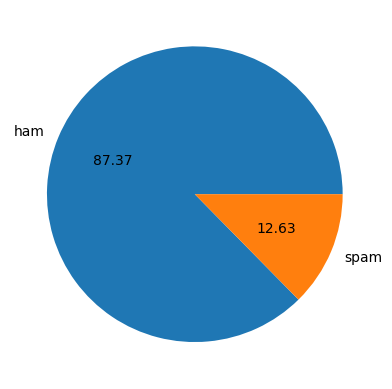

In [21]:
plt.pie(df["Target"].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")
plt.show()

In [22]:
df[df["Target"] == 1].head(653)


,Target,Input
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [23]:
! pip install nltk

In [24]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satyam_07\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\satyam_07\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df["num_char"]= df["Input"].apply(len)

In [26]:
df.head()

,Target,Input,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df["num_word"]=df["Input"].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df

,Target,Input,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [29]:
df["num_sentance"]=df["Input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df

,Target,Input,num_char,num_word,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
df[["num_char","num_word","num_sentance"]].describe()

,num_char,num_word,num_sentance
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df["Target"]==0][["num_char","num_word","num_sentance"]].describe()

,num_char,num_word,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df["Target"]==1][["num_char","num_word","num_sentance"]].describe()

,num_char,num_word,num_sentance
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

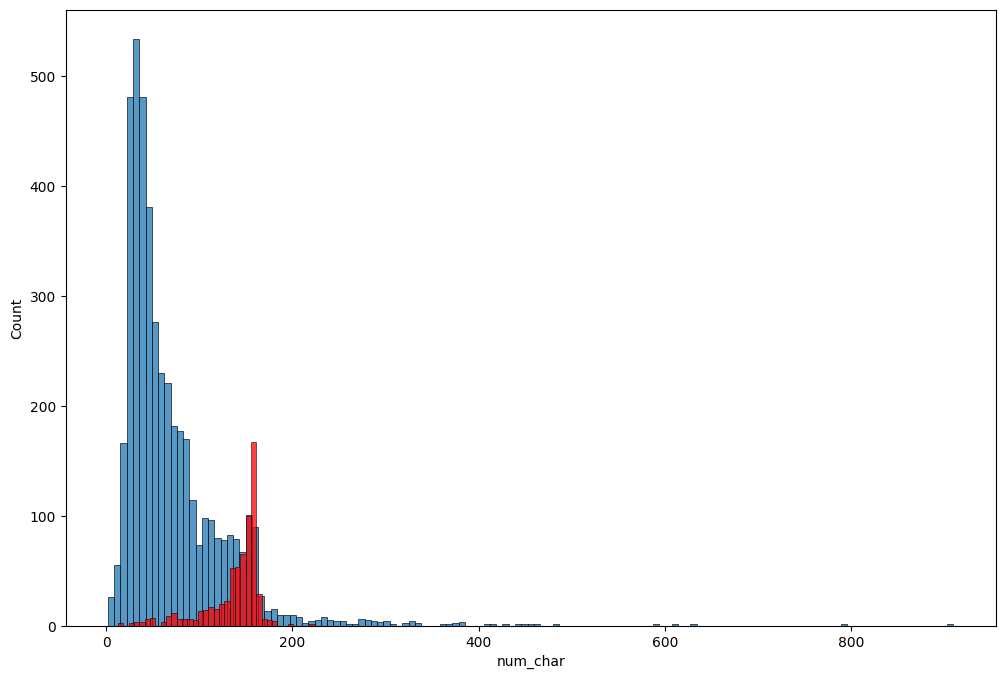

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["Target"]==0]["num_char"])
sns.histplot(df[df["Target"]==1]["num_char"],color = "red")

<Axes: xlabel='num_word', ylabel='Count'>

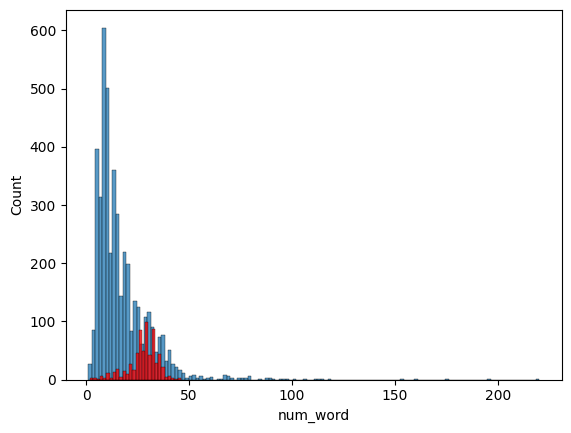

In [35]:
sns.histplot(df[df["Target"]==0]["num_word"])
sns.histplot(df[df["Target"]==1]["num_word"],color = "red")

<Axes: xlabel='num_sentance', ylabel='Count'>

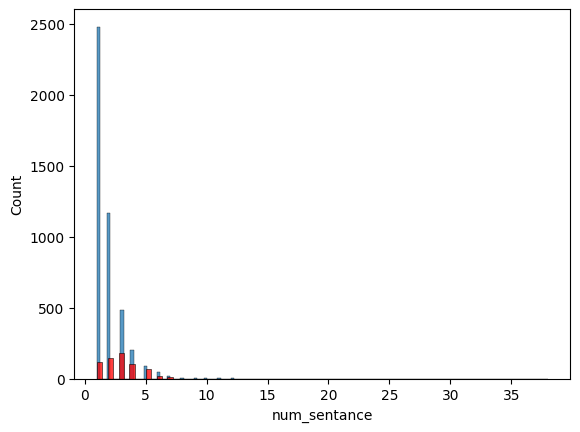

In [36]:
sns.histplot(df[df["Target"]==0]["num_sentance"])
sns.histplot(df[df["Target"]==1]["num_sentance"],color = "red")

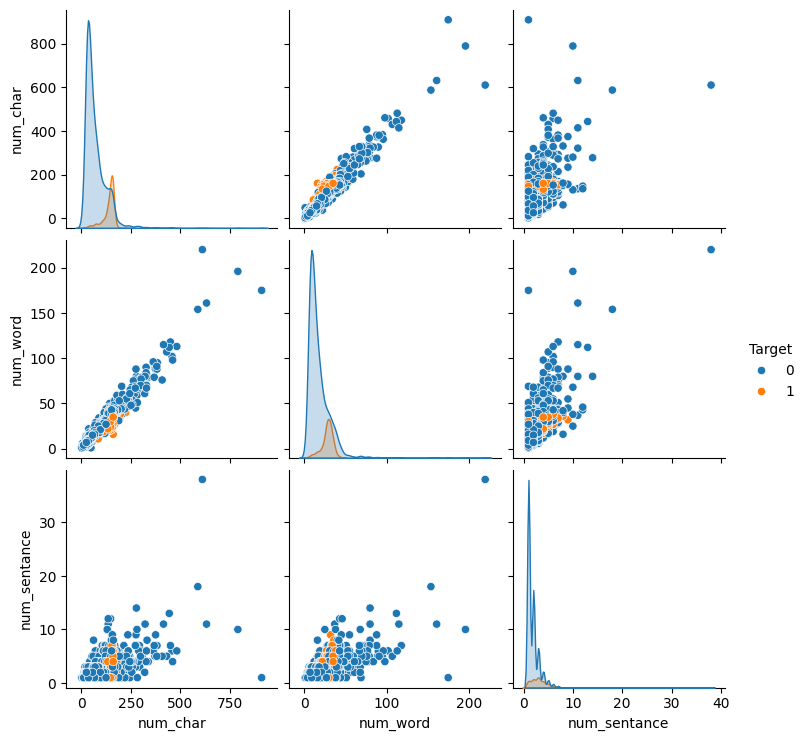

In [37]:
sns.pairplot(df,hue = "Target")
plt.show()

<Axes: >

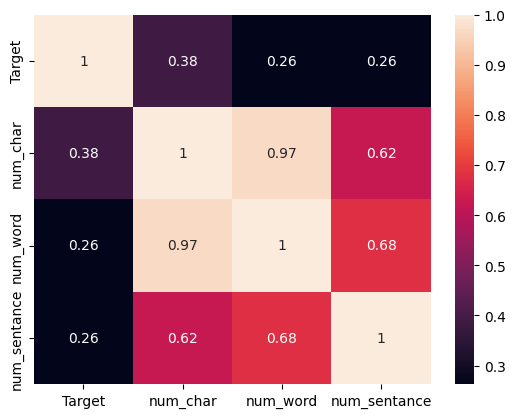

In [38]:
sns.heatmap(df[["Target","num_char","num_word","num_sentance"]].corr(),annot = True)

# 

# 

# 3 Data PreProcessing
## lower case
## tokenize
## removing special characters
## remove stopword and punctuation'
## steming

# 

# lower case

In [39]:
def transform_Input(Input):
    Input = Input.lower()
    return Input

In [40]:
transform_Input("hi how are you")

'hi how are you'

# tokenize

In [42]:
def transform_Input(Input):
    Input = Input.lower()
    Input = nltk.word_tokenize(Input)
    return Input

In [43]:
transform_Input("hi how are you")

['hi', 'how', 'are', 'you']

# 

# removing special character

In [45]:
def transform_Input(Input):
    Input = Input.lower()
    Input = nltk.word_tokenize(Input)
    y = []
    for i in Input:
        if i.isalnum():
            y.append(i)
    return y

In [46]:
transform_Input("hi how are you,@")

['hi', 'how', 'are', 'you']

# 

# removing stopword and punctuation

In [48]:
import nltk
import string
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download("punkt")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satyam_07\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satyam_07\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
def transform_Input(Input):
    Input = Input.lower()
    Input = nltk.word_tokenize(Input)
    y = []
    for i in Input:
        if i.isalnum():
            y.append(i)
    Input = y[:]
    y.clear()
    for i in Input: 
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    return y

In [50]:
transform_Input("hi how are you,satyam")

['hi', 'satyam']

# 

# steming

In [52]:
from nltk.stem.porter import PorterStemmer

In [53]:
ps = PorterStemmer()

In [54]:
ps.stem("dance,loving")

'dance,lov'

In [55]:
def transform_Input(Input):
    Input = Input.lower()
    Input = nltk.word_tokenize(Input)
    y = []
    for i in Input:
        if i.isalnum():
            y.append(i)
    Input = y[:]
    y.clear()
    for i in Input: 
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    Input = y[:]
    y.clear()
    for i in Input:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [56]:
transform_Input("I Loved YT Lecture on Machine learning . How About You")

'love yt lectur machin learn'

In [57]:
df["transform_Input"]= df["Input"].apply(transform_Input)

In [58]:
df.head()

,Target,Input,num_char,num_word,num_sentance,transform_Input
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
from wordcloud import WordCloud

In [61]:
wc = WordCloud(width=500,height = 500,min_font_size = 10,background_color = "black")

In [62]:
spam_wc = wc.generate(df[df["Target"]==1]["transform_Input"].str.cat(sep=" "))

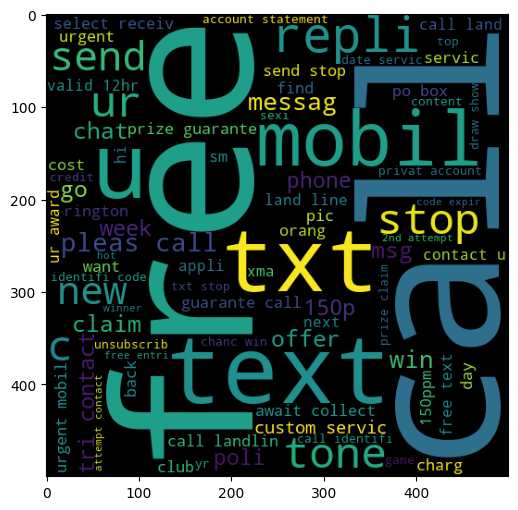

In [63]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [64]:
ham_wc = wc.generate(df[df["Target"]==0]["transform_Input"].str.cat(sep=" "))

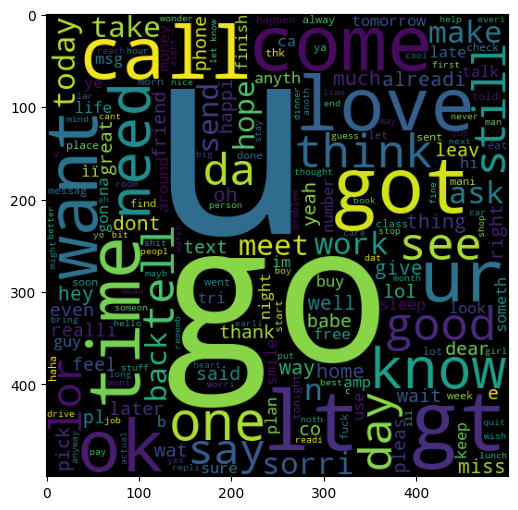

In [65]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [66]:
spam_corpus = []
for msg in df[df["Target"]==1]["transform_Input"].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [67]:
len(spam_corpus)


9939

In [68]:
! pip install collection

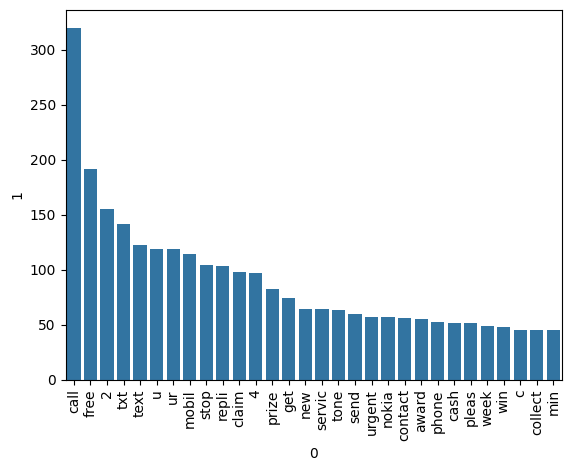

In [69]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(
    x=spam_df[0],
    y=spam_df[1]
)

plt.xticks(rotation=90)
plt.show()

In [70]:
ham_corpus = []
for msg in df[df["Target"]==0]["transform_Input"].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [71]:
len(ham_corpus)

35404

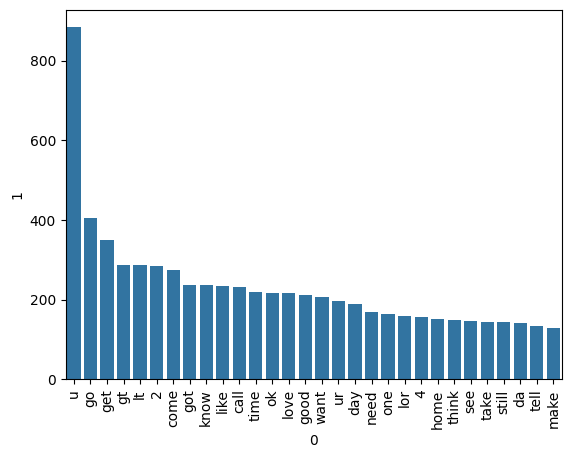

In [72]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(
    x=ham_df[0],
    y=ham_df[1]
)

plt.xticks(rotation=90)
plt.show()

# Model building

In [111]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [152]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [153]:
x = tfidf.fit_transform(df["transform_Input"]).toarray()

In [154]:
x.shape

(5169, 6708)

In [155]:
y = df["Target"].values

In [156]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [157]:
from sklearn.model_selection import train_test_split       

In [158]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.2,random_state = 2)

In [159]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [160]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [161]:
gnb.fit(x_train,y_train)
y_prid1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_prid1))
print(confusion_matrix(y_test,y_prid1))
print(precision_score(y_test,y_prid1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [162]:
mnb.fit(x_train,y_train)
y_prid2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_prid2))
print(confusion_matrix(y_test,y_prid2))
print(precision_score(y_test,y_prid2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [163]:
bnb.fit(x_train,y_train)
y_prid3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_prid3))
print(confusion_matrix(y_test,y_prid3))
print(precision_score(y_test,y_prid3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# conclusion

## in this project a multinomial naive bias wrok much better ans binomial naive bias work good but gausian naive bias work general level